In [5]:
import sys
import os
import numpy as np
import pandas as pd

from Dissects.io import (load_NDskl, 
                         load_image,
                         load_skeleton,
                         save_skeleton,
                         save_fits
                        )

from Dissects.image import (z_project,
                            thinning,
                            dilation)
from Dissects.geometry import Skeleton
from Dissects.segmentation.seg_2D import (segmentation, 
                                          junction_around_cell,
                                         vertices,
                                         junctions,
                                         generate_mesh)
from Dissects.analysis.analysis import (general_analysis,
                              cellstats
                              )

%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt

### Load image and take some information

In [46]:
# load image
image, metadata = load_image("/home/admin-suz/Documents/Code/Dissects/Dissects/stores/2d_images.tif")

In [47]:
pixel_ratio = metadata['pixel_ratio']
print(metadata)

{'pixel_ratio': 0.18323109343704702, 'height': 337, 'width': 576}


### Load file from Disperse and generate a skeleton

In [ ]:
# #load ndskl file 
# cp, fil, point, specs = load_NDskl("/home/admin-suz/Documents/Code/Dissects/Dissects/stores/2d_images.NDskl.a.NDskl")
# #create skeleton object
# skel = Skeleton(cp, fil, point, specs)

In [52]:
# Load skeleton to go faster
# Load skeleton
data = load_skeleton('/home/admin-suz/Documents/Code/Dissects/Dissects/stores/2d_skeleton.hf5')
skel = Skeleton(data['critical_point'], data['filament'], data['point'])

# Load specs information if you load skeleton from hf5 file
specs = {'ndims': 2,
 'bbox': np.array([0., 0.]),
 'bbox_delta': np.array([576., 337.]),
 'ncrit': 3525,
 'nfil': 3522}
skel.specs = specs

/home/admin-suz/miniconda3/lib/python3.7/site-packages/Dissects-0.0.1-py3.7.egg/Dissects/geometry/skeleton.py:25: UserWarning: Has pixel can be half pixel from DisPerSE output,                   we take the integer part of xyz values. 
  we take the integer part of xyz values. ")


In [53]:
#Clean skeleton
skel.remove_lonely_cp()
skel.remove_free_filament()

/home/admin-suz/miniconda3/lib/python3.7/site-packages/Dissects-0.0.1-py3.7.egg/Dissects/geometry/skeleton.py:61: UserWarning: specs dictionnary is not updated, ncrit value is not updated.
  "specs dictionnary is not updated, ncrit value is not updated.")


<IPython.core.display.Javascript object>


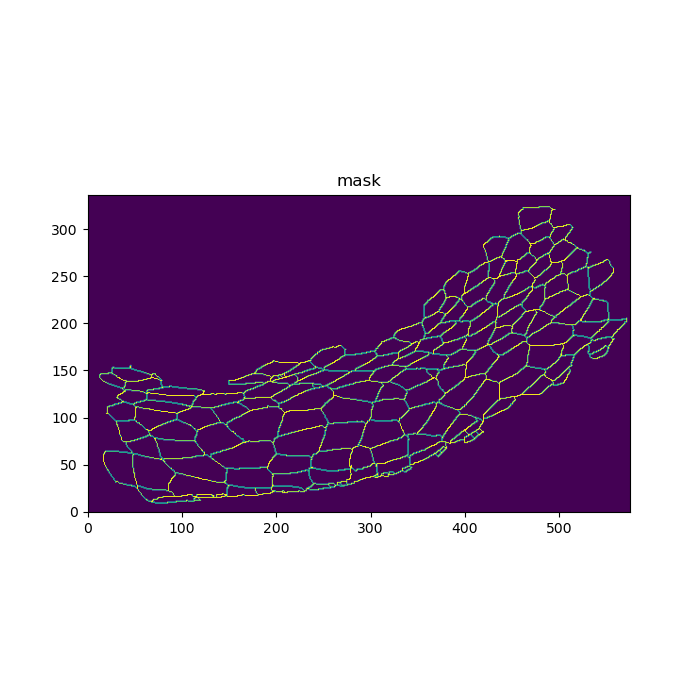

In [54]:
# Create mask and plot
mask = skel.create_binary_image()

plt.figure(figsize=(7,7))
plt.imshow(mask, origin='lower')
plt.title('mask')
mask = mask.astype(int)

## Analysis 

Since the skeleton is composed of filament of one pixel large. The skeleton need to be enlarge to measure correctly the junction. 

The enlargement value depend of your type of image, signal... 

In [74]:
width_enlargement = 1
mask_dilation = dilation(mask, width_enlargement)

<IPython.core.display.Javascript object>


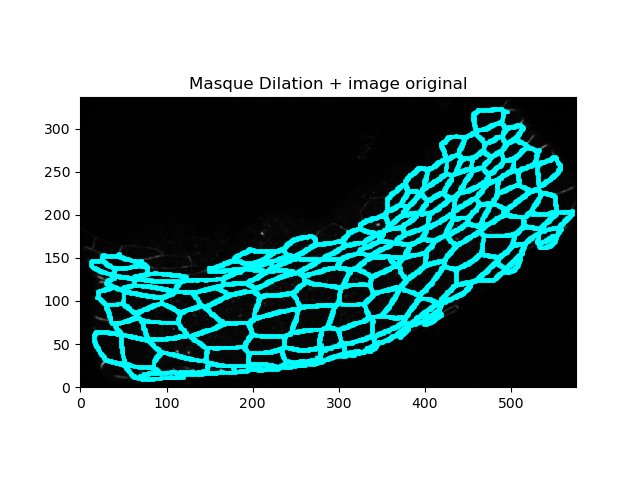

Text(0.5, 1.0, 'Masque Dilation + image original')

In [79]:
# Supperposition original image + enlarge mask
fig, ax = plt.subplots()
ax.imshow(image, origin='lower', cmap='gray')
y , x = np.where(mask_dilation != 0)
ax.scatter(x,y, alpha=0.8, s=1, color='cyan')
plt.title('Masque Dilation + image original')

### Visualisation of junction/background signal

<IPython.core.display.Javascript object>


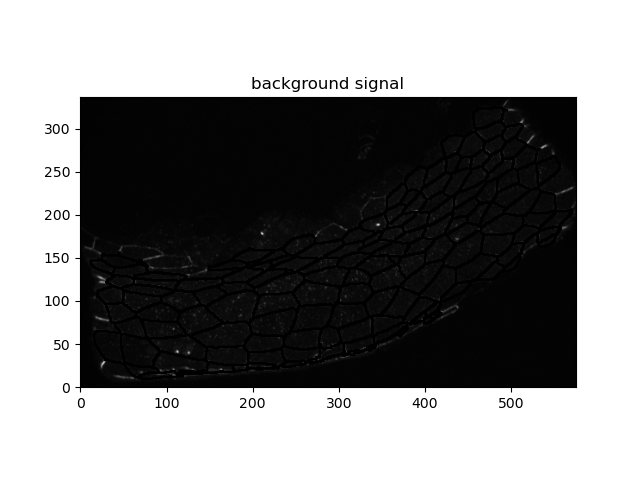

<IPython.core.display.Javascript object>


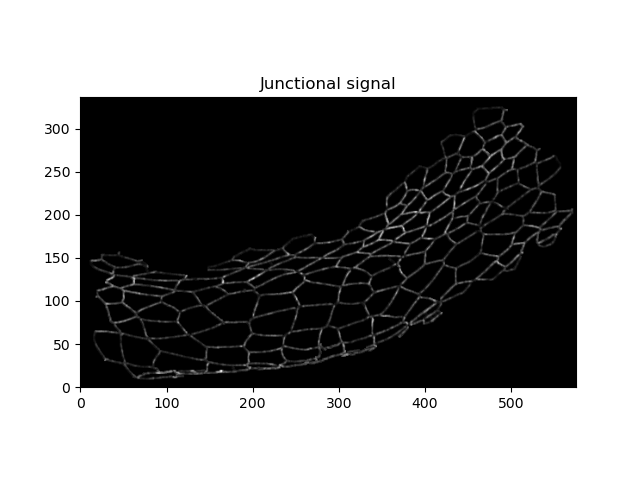

Text(0.5, 1.0, 'Junctional signal')

In [81]:
# Background
plt.figure()
plt.imshow((1-mask_dilation) * image, origin='lower', cmap='gray')
plt.title('background signal')


#Junction
plt.figure()
plt.imshow(mask_dilation*image, origin='lower', cmap='gray')
plt.title('Junctional signal')

### Analysis

In [83]:
result = general_analysis(image, mask_dilation)

(background_mean, background_std, 
 junctional_mean, junctional_std) = result

In [90]:
print('junctional mean =', junctional_mean,
      '\nbackground mean =', background_mean,
      '\njunctional std =', junctional_std,
      '\nbackground std =', background_std)

junctional mean = 5600.43290185754 
background mean = 679.6201338418364 
junctional std = 3750.4964749497253 
background std = 671.7302549690124
